In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'image_name','act_test','prob_of_image','pred_test'

# **only four model**

In [7]:
inceptionV3_name=[]
inceptionV3_acc=[]
inceptionV3_actual_label=[]
inceptionV3_predict_label=[]
import csv
with open('/content/drive/MyDrive/my theses project/codes/4-training and validation and testing /megdadi voting/csv files for train on data without segment/InceptionV3.csv', 'r') as file:
    reader = csv.reader(file)
    count=0
    for row in reader:
        if count==0:
          count=1
          continue
        else:
          inceptionV3_name.append(row[0])
          inceptionV3_actual_label.append(row[1])
          inceptionV3_acc.append(row[2])
          inceptionV3_predict_label.append(row[3])

In [3]:
densenet169_name=[]
densenet169_acc=[]
densenet169_actual_label=[]
densenet169_predict_label=[]
import csv
with open('/content/drive/MyDrive/my theses project/codes/4-training and validation and testing /megdadi voting/csv files for train on data without segment/densenet169.csv', 'r') as file:
    reader = csv.reader(file)
    count=0
    for row in reader:
        if count==0:
          count=1
          continue
        else:
          densenet169_name.append(row[0])
          densenet169_actual_label.append(row[1])
          densenet169_acc.append(row[2])
          densenet169_predict_label.append(row[3])

In [4]:
Resnet_name=[]
Resnet_acc=[]
Resnet_actual_label=[]
Resnet_predict_label=[]
import csv
with open('/content/drive/MyDrive/my theses project/codes/4-training and validation and testing /megdadi voting/csv files for train on data without segment/densenet169.csv', 'r') as file:
    reader = csv.reader(file)
    count=0
    for row in reader:
        if count==0:
          count=1
          continue
        else:
          Resnet_name.append(row[0])
          Resnet_actual_label.append(row[1])
          Resnet_acc.append(row[2])
          Resnet_predict_label.append(row[3])

In [5]:
Efficient_name=[] 
Efficient_acc=[]
Efficient_actual_label=[]
Efficient_predict_label=[]
import csv
with open('/content/drive/MyDrive/my theses project/codes/4-training and validation and testing /megdadi voting/csv files for train on data without segment/efficient B7.csv', 'r') as file:
    reader = csv.reader(file)
    count=0
    for row in reader:
        if count==0:
          count=1
          continue
        else:
          Efficient_name.append(row[0])
          Efficient_actual_label.append(row[1])
          Efficient_acc.append(row[2])
          Efficient_predict_label.append(row[3])

In [8]:
##################################
#save final weight for each classifier
Resnet_weight=[]
#Vgg16_weight=[]
#Vgg19_weight=[]
densenet169_weight=[]
Efficient_weight=[]
inceptionV3_weight=[]
#Mobilenet_weight=[]

numberofClassifier=4
# get images one by one!
for img in range(0,len(Resnet_name)):
  # determine Numerator for each classifier
  Resnet_Numerator=float(Resnet_acc[img])
  #Vgg16_Numerator=float(Vgg16_acc[img])
  #Vgg19_Numerator=float(Vgg19_acc[img])
  densenet169_Numerator=float(densenet169_acc[img])
  Efficient_Numerator=float(Efficient_acc[img])
  inceptionV3_Numerator=float(inceptionV3_acc[img])
  #Mobilenet_Numerator=float(Mobilenet_acc[img])
    
  # compute the sum accuracy foreach image from classifier
  denominator=float(Resnet_acc[img])+float(densenet169_acc[img])+float(inceptionV3_acc[img])+float(Efficient_acc[img])

  #append weight
  Resnet_weight.append(float(Resnet_Numerator/denominator))
    
  #Vgg16_weight.append(float(Vgg16_Numerator/denominator))
    
  #Vgg19_weight.append(float(Vgg19_Numerator/denominator))
    
  densenet169_weight.append(float(densenet169_Numerator/denominator))

  Efficient_weight.append(float(Efficient_Numerator/denominator))
    
  inceptionV3_weight.append(float(inceptionV3_Numerator/denominator))
    
  #Mobilenet_weight.append(float(Mobilenet_Numerator/denominator))

In [10]:
x=Resnet_weight[51]+inceptionV3_weight[51]+densenet169_weight[51]+Efficient_weight[51]
x

1.0

In [11]:
#find summation of weight for each class 
Adult_Summation_weight_0=[]#Covid_Summation_weight_0
Nymph_Summation_weight_1=[]#Normal_Summation_weight_1
Grasshopper_Summation_weight_2=[]#Pneumonia_Summation_weight_2

numberofClassifier=4
# get images one by one!
for img in range(0,len(Resnet_name)):
  sum_0=0
  sum_1=0
  sum_2=0
  if Resnet_predict_label[img]=='0':
    sum_0=sum_0+Resnet_weight[img]
  if Resnet_predict_label[img]=='1':
    sum_1=sum_1+Resnet_weight[img]
  if Resnet_predict_label[img]=='2':
    sum_2=sum_2+Resnet_weight[img]

  """
  if Vgg19_predict_label[img]=='0':
    sum_0=sum_0+Vgg19_weight[img]
  if Vgg19_predict_label[img]=='1':
    sum_1=sum_1+Vgg19_weight[img]
  if Vgg19_predict_label[img]=='2':
    sum_2=sum_2+Vgg19_weight[img]
  """
  if densenet169_predict_label[img]=='0':
    sum_0=sum_0+densenet169_weight[img]
  if densenet169_predict_label[img]=='1':
    sum_1=sum_1+densenet169_weight[img]
  if densenet169_predict_label[img]=='2':
    sum_2=sum_2+densenet169_weight[img]

  if inceptionV3_predict_label[img]=='0':
    sum_0=sum_0+inceptionV3_weight[img]
  if inceptionV3_predict_label[img]=='1':
    sum_1=sum_1+inceptionV3_weight[img]
  if inceptionV3_predict_label[img]=='2':
    sum_2=sum_2+inceptionV3_weight[img]

  if Efficient_predict_label[img]=='0':
    sum_0=sum_0+Efficient_weight[img]
  if Efficient_predict_label[img]=='1':
    sum_1=sum_1+Efficient_weight[img]
  if Efficient_predict_label[img]=='2':
    sum_2=sum_2+Efficient_weight[img]


  Adult_Summation_weight_0.append(sum_0)
  Nymph_Summation_weight_1.append(sum_1)
  Grasshopper_Summation_weight_2.append(sum_2)

In [12]:
len(Resnet_weight)

685

In [13]:
final_prediction=[]
for i in range(0,len(Adult_Summation_weight_0)):
  if Adult_Summation_weight_0[i]>Nymph_Summation_weight_1[i] and Adult_Summation_weight_0[i]>Grasshopper_Summation_weight_2[i]:
    final_prediction.append('0')
  elif Nymph_Summation_weight_1[i]>Grasshopper_Summation_weight_2[i]:
    final_prediction.append('1')
  else: final_prediction.append('2')


In [ ]:
"""
#save in excel
#save prediced value in excel
import pandas as pd
pd.set_option('display.max_rows', None)

columes = {'image_name':Mobilenet_name,'Mobilenet_acc':Mobilenet_acc,'Resnet_predict_label':Resnet_predict_label,'Mobilenet_predict_label':Mobilenet_predict_label,'Mobilenet_weight':Mobilenet_weight,
                                        'Resnet_acc':Resnet_acc,'Resnet_predict_label':Resnet_predict_label,'Mobilenet_predict_label':Mobilenet_predict_label,'Mobilenet_weight':Mobilenet_weight
                                        'Mobilenet_acc':Mobilenet_acc,'Resnet_predict_label':Resnet_predict_label,'Mobilenet_predict_label':Mobilenet_predict_label,'Mobilenet_weight':Mobilenet_weight
                                        'Mobilenet_acc':Mobilenet_acc,'Resnet_predict_label':Resnet_predict_label,'Mobilenet_predict_label':Mobilenet_predict_label,'Mobilenet_weight':Mobilenet_weight
                                        'Mobilenet_acc':Mobilenet_acc,'Resnet_predict_label':Resnet_predict_label,'Mobilenet_predict_label':Mobilenet_predict_label,'Mobilenet_weight':Mobilenet_weight
                                        'Mobilenet_acc':Mobilenet_acc,'Resnet_predict_label':Resnet_predict_label,'Mobilenet_predict_label':Mobilenet_predict_label,'Mobilenet_weight':Mobilenet_weight}

df = pd.DataFrame(columes, columns = ['image_name','act_test','prob_of_image','pred_test'])
df.to_csv('/content/drive/MyDrive/cnn/excels by ali /Vgg16.csv',index=False, header=True)
print('complete task!!')
"""

In [14]:
count =0
for i in range(0,len(final_prediction)):
  if Resnet_actual_label[i]==final_prediction[i]:
    count=count+1
print(count)

648


Confusion matrix, without normalization
[[207   0  20]
 [  0 229   0]
 [ 16   1 212]]


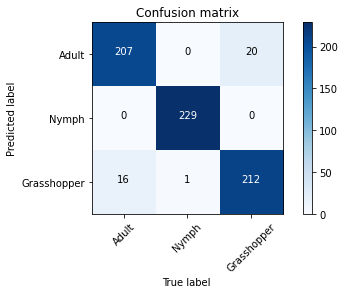

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
cm=cm=confusion_matrix(Resnet_actual_label,final_prediction)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label ')

classes =['Adult', 'Nymph', 'Grasshopper']

plot_confusion_matrix(cm, classes)


In [16]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
print ('Report : ')
print (classification_report(Resnet_actual_label,final_prediction,target_names=classes,digits=20 ))

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# F1_score 
F1_score = 2* TP/((2*TP)+FP+FN)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy = ', np.mean(ACC))
print('Sensitivity = ', np.mean(TPR))
print('Specificity = ', np.mean(TNR))
print('Precision = ', np.mean(PPV))
print('F1_score = ', np.mean(F1_score))
print(np.mean(TN))
print(np.mean(TP))
print(np.mean(FP))
print(np.mean(FN))



Report : 
                      precision    recall  f1-score   support

               Adult  0.92825112107623319879 0.91189427312775328538 0.91999999999999992895       227
               Nymph  0.99565217391304350336 1.00000000000000000000 0.99782135076252720385       229
         Grasshopper  0.91379310344827591184 0.92576419213973804023 0.91973969631236440758       229

            accuracy                      0.94598540145985399175       685
           macro avg  0.94589879947918420466 0.94588615508916384922 0.94585368235829714312       685
        weighted avg  0.94595032554751401488 0.94598540145985399175 0.94592916756226286257       685

Accuracy =  0.9639902676399027
Sensitivity =  0.9458861550891638
Specificity =  0.9730042902014863
Precision =  0.9458987994791842
F1_score =  0.9458536823582971
444.3333333333333
216.0
12.333333333333334
12.333333333333334


# **----------------------------------------------------------------------------------**

# **majoroty voting**

In [ ]:

"""
Resnet_weight=[]
Vgg16_weight=[]
Vgg19_weight=[]
densenet169_weight=[]
inceptionV3_weight=[]
Mobilenet_weight=[]


Resnet_name=[]
Resnet_acc=[]
Resnet_actual_label=[]
Resnet_predict_label=[]

Vgg16_name=[]
Vgg16_acc=[]
Vgg16_actual_label=[]
Vgg16_predict_label=[]

Vgg19_name=[]
Vgg19_acc=[]
Vgg19_actual_label=[]
Vgg19_predict_label=[]

densenet169_name=[]
densenet169_acc=[]
densenet169_actual_label=[]
densenet169_predict_label=[]

inceptionV3_name=[]
inceptionV3_acc=[]
inceptionV3_actual_label=[]
inceptionV3_predict_label=[]


"""

In [17]:
final_prediction_voting=[]
pred_sum_0=[]
pred_sum_1=[]
pred_sum_2=[]

for img in range (0,len(Resnet_predict_label)):
  sum_0=0
  sum_1=0
  sum_2=0
  
  if Resnet_predict_label[img]=='0':
    sum_0=sum_0+1
  if Resnet_predict_label[img]=='1':
    sum_1=sum_1+1
  if Resnet_predict_label[img]=='2':
    sum_2=sum_2+1
  """
  if Vgg16_predict_label[img]=='0':
    sum_0=sum_0+1
  if Vgg16_predict_label[img]=='1':
    sum_1=sum_1+1
  if Vgg16_predict_label[img]=='2':
    sum_2=sum_2+1
  """
  if inceptionV3_predict_label[img]=='0':
    sum_0=sum_0+1
  if inceptionV3_predict_label[img]=='1':
    sum_1=sum_1+1
  if inceptionV3_predict_label[img]=='2':
    sum_2=sum_2+1

  if densenet169_predict_label[img]=='0':
    sum_0=sum_0+1
  if densenet169_predict_label[img]=='1':
    sum_1=sum_1+1
  if densenet169_predict_label[img]=='2':
    sum_2=sum_2+1
  """
  if inceptionV3_predict_label[img]=='0':
    sum_0=sum_0+1
  if inceptionV3_predict_label[img]=='1':
    sum_1=sum_1+1
  if inceptionV3_predict_label[img]=='2':
    sum_2=sum_2+1

  if Mobilenet_predict_label[img]=='0':
    sum_0=sum_0+1
  if Mobilenet_predict_label[img]=='1':
    sum_1=sum_1+1
  if Mobilenet_predict_label[img]=='2':
    sum_2=sum_2+1
  """
  if Efficient_predict_label[img]=='0':
    sum_0=sum_0+1
  if Efficient_predict_label[img]=='1':
    sum_1=sum_1+1
  if Efficient_predict_label[img]=='2':
    sum_2=sum_2+1

  pred_sum_0.append(sum_0)
  pred_sum_1.append(sum_1)
  pred_sum_2.append(sum_2)

In [18]:
for i in range(0,len(pred_sum_0)):
  if pred_sum_0[i]>pred_sum_1[i] and pred_sum_0[i]>pred_sum_2[i]:
    final_prediction_voting.append('0')
  elif pred_sum_1[i]>pred_sum_2[i]:
    final_prediction_voting.append('1')
  else: final_prediction_voting.append('2')

Confusion matrix, without normalization
[[194   5  28]
 [  0 229   0]
 [  5   0 224]]


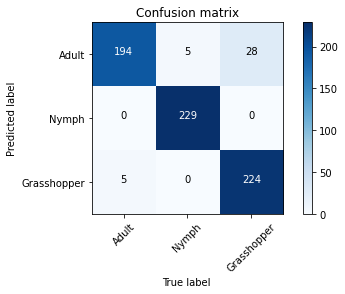

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
cm=cm=confusion_matrix(Resnet_actual_label,final_prediction_voting)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label ')

classes =['Adult', 'Nymph', 'Grasshopper']

plot_confusion_matrix(cm, classes)

In [21]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
print ('Report : ')
print (classification_report(Resnet_actual_label,final_prediction_voting,target_names=classes,digits=20 ))

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# F1_score 
F1_score = 2* TP/((2*TP)+FP+FN)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy = ', np.mean(ACC))
print('Sensitivity = ', np.mean(TPR))
print('Specificity = ', np.mean(TNR))
print('Precision = ', np.mean(PPV))
print('F1_score = ', np.mean(F1_score))
print(np.mean(TN))
print(np.mean(TP))
print(np.mean(FP))
print(np.mean(FN))



Report : 
                      precision    recall  f1-score   support

               Adult  0.97487437185929648464 0.85462555066079293198 0.91079812206572774436       227
               Nymph  0.97863247863247859737 1.00000000000000000000 0.98920086393088546561       229
         Grasshopper  0.88888888888888883955 0.97816593886462877006 0.93139293139293122259       229

            accuracy                      0.94452554744525552000       685
           macro avg  0.94746524646022134419 0.94426382984180723401 0.94379730579651488487       685
        weighted avg  0.94738521981672041417 0.94452554744525552000 0.94389365377821055070       685

Accuracy =  0.9630170316301703
Sensitivity =  0.9442638298418072
Specificity =  0.9722381827932276
Precision =  0.9474652464602213
F1_score =  0.9437973057965149
444.0
215.66666666666666
12.666666666666666
12.666666666666666


In [ ]:
###################################################